# Introduction to Scikit-Learn: Machine Learning with Python

**Validation and Model Selection**

郭耀仁

## Validation

## About validation

One of the most important pieces of machine learning is **model validation**: that is, checking how well your model fits a given dataset.

## Is our model any good?

- Accuracy
- Computation time
- Interpretability

## 3 Types of Tasks to Bear in Mind

- Classification 
- Regression 
- Clustering

## Classification

- Accuracy and Error
- Accuracy goes up when Error goes down

$$
Accuracy = \frac{\text{correctly classified instances}}{\text{total amount of classified instances}} \\
\\
Error = 1 - Accuracy
$$

## Consider the Titanic Kaggle dataset we've introduced previously

In [1]:
!kaggle competitions download -c titanic --force

401 - Unauthorized


In [2]:
import pandas as pd

train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## About the Titanic Shipwrecks History

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
>
> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Using a dummy classifier built with our instincts

In [3]:
import numpy as np

def dummy_classifier(x):
    if x == "male":
        return 0
    else:
        return 1

## Now we'll use this classifier to *predict* labels for the data

In [4]:
y_pred = np.array(list(map(dummy_classifier, train["Sex"])))
y_train = train["Survived"].values
accuracy = (y_pred == y_train).sum() / y_pred.size

## How might we check how well our model performs?

In [5]:
print("Predicted labels:")
print(y_pred[:30])
print("======")
print("Real labels:")
print(y_train[:30])
print("======")
print("{} / {} correct".format((y_pred == y_train).sum(), y_pred.size))
print("Accuracy: {:.2f}%".format(accuracy*100))

Predicted labels:
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0]
Real labels:
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0]
701 / 891 correct
Accuracy: 78.68%


## Limits of Accuracy: Classifying very rare heart disease

- Classify all as negative (not sick)
- Predict 99 correct (not sick) and miss 1
- Accuracy: 99%
- Missed every positive case

## Confusion Matrix

- Rows and columns contain all available labels
- Each cell contains frequency of instances that are classified in a certain way

![](images/conf_mat.png)

Source: <https://en.wikipedia.org/wiki/Confusion_matrix>

## Important Confusion Matrix Components

- True positive
- True negative
- False positive
- False negative

## Classifying very rare heart disease again

- True positive: 0
- True negative: 99
- False positive: 0
- False negative: 1

## Using recall and precision for the case now

- Recall

$$
Recall = \frac{\text{True positive}}{\text{Condition positive}} = \frac{0}{1} = 0 \%
$$

- Precision

$$
Precision = \frac{\text{True positive}}{\text{Predicted condition positive}} = \frac{0}{0} = \text{Undefined}
$$

## Getting Confusion Matrix through Scikit-Learn

<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>

In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred)
tn = cm[0, 0]
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
print(cm)
print("True positive: {}".format(tp))
print("True negative: {}".format(tn))
print("False negative: {}".format(fn))
print("False positive: {}".format(fp))

[[468  81]
 [109 233]]
True positive: 233
True negative: 468
False negative: 109
False positive: 81


## Regression

- Mean Square Error(MSE)
- Mean distance between estimates and regression line

$$MSE = \frac{1}{m}\sum_{i=1}^m(\hat{y_i} - y_i) ^ 2$$

$y_i$: actual outcome for obs. $i$

$\hat{y_i}$: predicted outcome for obs. $i$

$m$: Number of obs.

## Clustering

- No label information
- Performance measure consists of 2 elements:
    - Similarity within each cluster
    - Similarity between clusters

## Similarity within each cluster

- Within sum of squares (WSS)
- **Minimize** diameter

![](images/diameter.png)

## Similarity between clusters

- Between cluster sum of squares (BSS)
- **Maximize** intercluster distance

![](images/inter-cluster.png)

## Using Dunn's Index to identify the performance of clustering

$$Dunn's Index = \frac{\text{minimal intercluster distance}}{\text{maximal diameter}}$$

## Validation Sets

## Machine Learning vs. Statistics

- Predictive power vs. descriptive power
- Supervised learning: model must predict **unseen** observations
- Statistics: model must fit data to explain or describe data

## Machine Learning vs. Statistics

- Predictive power vs. descriptive power
- Supervised learning: model must predict **unseen** observations
- Statistics: model must fit data to explain or describe data

## Training on training set, not on complete dataset 

- Using test set to validate performance of model
- Sets are **disjoint**
- Model tested on unseen observations in order to be generalized

## Training on training set, not on complete dataset 

- Using test set to validate performance of model
- Sets are **disjoint**
- Model tested on unseen observations in order to be generalized

![](images/split-data.png)

## Training/test set are mainly used in supervised learning, not for unsupervised due to data not labeled

## How to split the sets?

- Which observations go where?
- Training set should be larger than test set
- Typically about 3:1
- Quite arbitrary
- Generally: more data -> better model
- Test set not too small

## Distribution of the sets

- For classification:
    - Classes must have similar distributions
    - Avoid a class not being available in a set
- For classification and regression:
    - Shuffling dataset before splitting

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd

train = pd.read_csv("train.csv")
X_train = train.drop("Survived", axis=1).values
y_train = train["Survived"].values
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
print(train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(891, 12)
(668, 11)
(223, 11)
(668,)
(223,)


## Create a `train_test_split` function by ourselves

## Sampling can affect performance measures

- Adding robustness to these measures: **cross-validation**
- Core idea of cross-validation: Sampling multiple times, with different separations

## What a 4-fold cross-validation looks like?

![](images/four-folds.png)

In [8]:
from sklearn.model_selection import KFold
import pandas as pd

train = pd.read_csv("train.csv")
kf = KFold(n_splits=4, shuffle=True, random_state=123)
for train_index, test_index in kf.split(train):
    print("TRAIN:", train_index)
    print("TEST:", test_index)

TRAIN: [  0   1   2   3   6   7   8   9  10  12  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  37  38  39  40  42  44
  45  46  47  49  50  51  53  56  58  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  76  77  79  80  81  82  83  84  85  86  87  88  89
  92  93  94  95  96  98  99 101 104 105 106 108 109 110 111 112 113 114
 115 116 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133 135
 136 137 139 140 141 142 143 144 146 148 149 150 152 153 154 155 157 158
 159 160 163 165 166 168 169 173 174 175 176 178 179 180 181 183 184 186
 187 189 190 191 192 193 194 197 198 199 201 202 204 205 206 207 208 211
 212 213 214 215 216 217 218 219 220 222 223 224 225 228 230 231 232 233
 234 235 238 241 242 243 244 245 246 247 248 250 251 253 254 255 256 257
 258 259 262 264 265 268 271 275 276 277 278 281 282 283 284 286 287 288
 289 290 291 292 293 295 296 297 298 300 301 302 304 305 308 309 311 312
 314 315 319 320 321 322 323 324 325 326 328

## k-fold cross-validation

- Fold test set over dataset n times
- Each test set is 1/k size of total dataset

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def dummy_classifier(x):
    if x == "male":
        return 0
    else:
        return 1

train = pd.read_csv("train.csv")
X_train = train["Sex"].values
y_train = train["Survived"].values
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
kf = KFold(n_splits=10, shuffle=True, random_state=123)
for train_index, valid_index in kf.split(X_train):
    X_valid_cv = X_train[valid_index]
    y_valid_cv = y_train[valid_index]
    y_pred_cv = np.array(list(map(dummy_classifier, X_valid_cv)))
    accuracy = (y_pred_cv == y_valid_cv).sum() / y_pred_cv.size
    print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 73.13%
Accuracy: 73.13%
Accuracy: 82.09%
Accuracy: 74.63%
Accuracy: 80.60%
Accuracy: 86.57%
Accuracy: 80.60%
Accuracy: 76.12%
Accuracy: 74.24%
Accuracy: 84.85%


## Bias and Variance

## The main goal of supervised learning is prediction

Prediction error can be decomposed as **reducible** and **irreducible** error

## Irreducible error is commonly referred as noise, cannot be minimized

## Reducible error is commonly caused by model unfit

- We can try to minize it!
- Reducible error is split into **bias** and **variance**

## A quick recap

- Prediction errors
    - Irreducible error
    - Reducible error
        - Bias
        - Variance

## Bias: wrong assumptions

- Difference between predictions and truth
- Using models trained by a specific learning algorithm

## An example of bias

Quadratic data but using linear model

![](images/bias.png)

## Variance: sampling of the training set

- Model with high variance fits **training set** closely

## An example of variance

- Quadratic data using polynomial model fits perfectly through training set
- High variance leads model generalizing bad to test set

![](images/variance.png)

## Bias and Variance Tradeoff

- low bias leads to high variance
- low variance leads to high bias

## Overfitting

- Model fits **training set** a lot better than test set
- High variance
- Too specific

## Underfitting

- Model does not fit **training set**, nor does **test set**
- High bias
- Too general

## The importance

The issues associated with validation and 
cross-validation are some of the most important
aspects of the practice of machine learning.

## If our estimator is underperforming, how should we move forward?

- Use simpler or more complicated model?
- Add more features to each observed data point?
- Add more training samples?

## The answer is often counter-intuitive

In particular, **Sometimes using a
more complicated model will give _worse_ results.**  Also, **Sometimes adding
training data will not improve your results.**  The ability to determine
what steps will improve your model is what separates the successful machine
learning practitioners from the unsuccessful.

## Illustration of the Bias-Variance Tradeoff

In [10]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

Now let's create a realization of this dataset:

In [11]:
def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    
    return X, y

In [12]:
import matplotlib.pyplot as plt

X, y = make_data(40, error=1)
plt.scatter(X.ravel(), y)
plt.show()

<Figure size 640x480 with 1 Axes>

Now say we want to perform a regression on this data.  Let's use the built-in linear regression function to compute a fit:

Text(0.5, 1.0, 'mean squared error: 1.79')

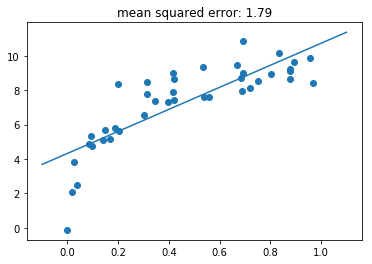

In [13]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

In [14]:
plt.show()

## We have fit a straight line to the data, but clearly this model is not a good choice

We say that this model is **biased**, or that it **under-fits** the data.

## Let's try to improve this by creating a more complicated model

We can do this by adding degrees of freedom, and computing a polynomial regression over the inputs.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Now we'll use this to fit a quadratic curve to the data.

Text(0.5, 1.0, 'mean squared error: 0.92')

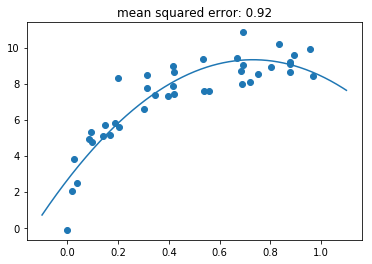

In [16]:
model = PolynomialRegression(2)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

In [17]:
plt.show()

This reduces the mean squared error, and makes a much better fit.  What happens if we use an even higher-degree polynomial?

(-4, 14)

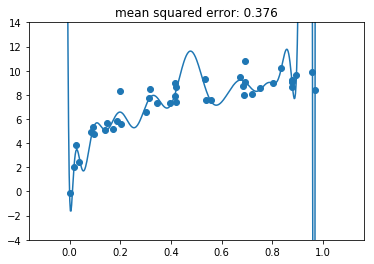

In [18]:
model = PolynomialRegression(30)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
plt.ylim(-4, 14)

In [19]:
plt.show()

When we increase the degree to this extent, it's clear that the resulting fit is no longer reflecting the true underlying distribution, but is more sensitive to the noise in the training data. For this reason, we call it a **high-variance model**, and we say that it **over-fits** the data.

## Detecting Over-fitting with Validation Curves

## Computing the error on the training data is not enough

As above, we can use **cross-validation** to get a better handle on how the model fit is working.

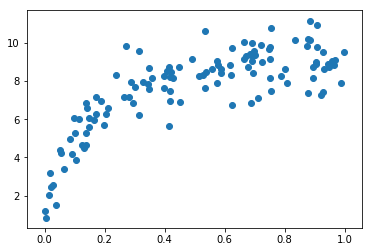

In [20]:
X, y = make_data(120, error=1.0)
plt.scatter(X, y)
plt.show()

In [21]:
from sklearn.model_selection import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

degree = np.arange(0, 18)
val_train, val_test = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7, scoring=rms_error)

Now let's plot the validation curves:

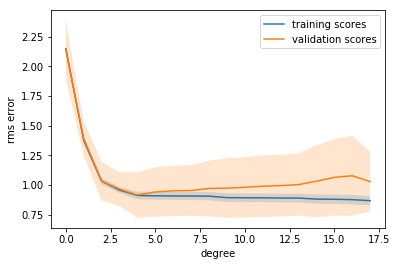

In [22]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend()

In [23]:
plt.show()

## Notice the trend here

1. For a small model complexity, the training error and validation error are very similar. This indicates that the model is **under-fitting** the data: it doesn't have enough complexity to represent the data. Another way of putting it is that this is a **high-bias** model.

2. As the model complexity grows, the training and validation scores diverge. This indicates that the model is **over-fitting** the data: it has so much flexibility, that it fits the noise rather than the underlying trend. Another way of putting it is that this is a **high-variance** model.

3. Note that the training score (nearly) always improves with model complexity. This is because a more complicated model can fit the noise better, so the model improves. The validation data generally has a sweet spot, which here is around 5 terms.

Here's our best-fit model according to the cross-validation:

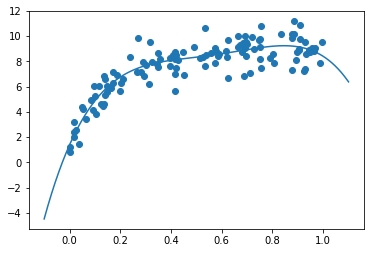

In [24]:
model = PolynomialRegression(4).fit(X, y)
plt.scatter(X, y)
plt.plot(X_test, model.predict(X_test))
plt.show()